In [1]:
import numpy as np
import matplotlib.pyplot as plt

train_size = 256
test_size = 4096

def gen_data(seed):
        np.random.seed(seed)
        # Generate training data
        y_train = np.random.choice([-1,1], size=train_size, p=[0.5,0.5])
        y_train.sort()
        y_test = np.random.choice([-1,1], size=test_size, p=[0.5,0.5])
        y_test.sort()
        X_train = np.zeros((train_size, 2))
        X_test = np.zeros((test_size, 2))

        # if y = 1
        mean1 = [3,2]
        cov1 = [[.4, 0],
                [0, .4]]
        # if y = -1
        mean2 = [5,0]
        cov2 = [[.6, 0],
                [0, .6]]

        for i in range(train_size):
                if y_train[i] == 1:
                        X_train[i] = np.random.multivariate_normal(mean1, cov1, 1)
                else:
                        X_train[i] = np.random.multivariate_normal(mean2, cov2, 1)
        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        y_train = y_train.reshape(-1,1)

        for i in range(test_size):
                if y_test[i] == 1:
                        X_test[i] = np.random.multivariate_normal(mean1, cov1, 1)
                else:
                        X_test[i] = np.random.multivariate_normal(mean2, cov2, 1)
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        y_test = y_test.reshape(-1,1)

        # (256, 3) (256, 1) (4096, 3) (4096, 1
        return X_train, y_train, X_test, y_test


# Q9

In [2]:
random_seed = 128

errlist1 = []

for seed in range(random_seed):
    X_train, y_train, X_test, y_test = gen_data(seed)
    wlin = np.matmul(np.linalg.pinv(X_train),y_train)
    y_pred = np.matmul(X_train,wlin)
    err_in = ((1/train_size)*sum((y_pred-y_train)**2))
    errlist1.append(err_in)

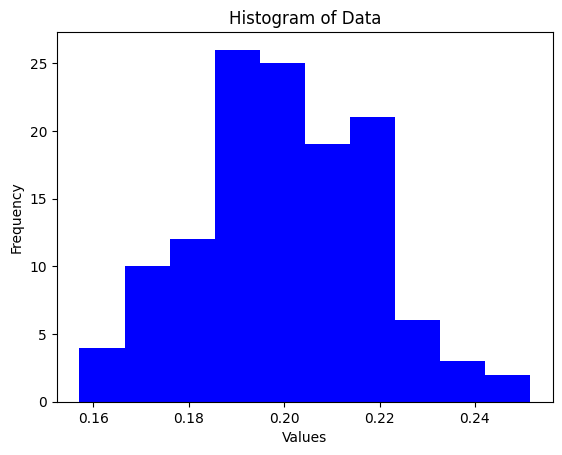

Median:  0.1992322110339363


In [3]:
# Create a histogram
errlist = np.array(errlist1).flatten()
plt.hist(errlist, color='blue')

# Customize labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Data")

# Show the plot
plt.show()

print("Median: ", np.median(errlist))


# Q10

In [4]:
random_seed = 128

errlist2 = []

for seed in range(random_seed):
    err_in = 0
    X_train, y_train, X_test, y_test = gen_data(seed)
    wlin = np.matmul(np.linalg.pinv(X_train),y_train)
    y_pred = np.matmul(X_train,wlin)
    for i in range(len(y_pred)):
        if np.sign(y_pred[i]) != np.sign(y_train[i]):
            err_in += 1
    err_in = err_in/train_size
    errlist2.append(err_in)

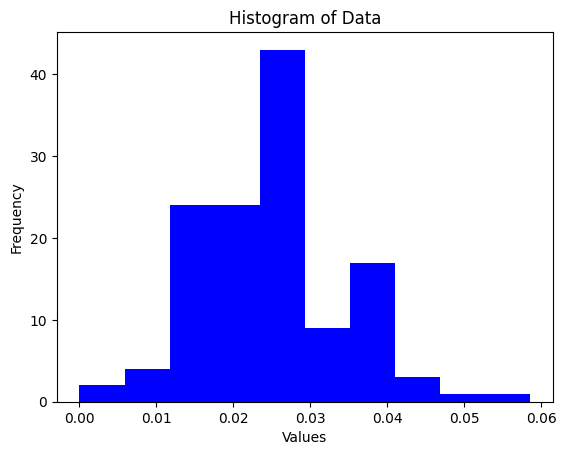

Median:  0.0234375


In [5]:
# Create a histogram
errlist2 = np.array(errlist2).flatten()
plt.hist(errlist2, color='blue')

# Customize labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Data")

# Show the plot
plt.show()

print("Median: ", np.median(errlist2))


# Q11

In [6]:
def logistic_reg_err(X_train, y_train, X_test, y_test):
    w = np.zeros((X_train.shape[1],1))
    for i in range(500):
        tmp = np.zeros((X_train.shape[1],1))
        for j in range(train_size):
            tmp += (1/(1+np.exp(y_train[j]*np.matmul(X_train[j],w))))*y_train[j]*X_train[j].reshape(-1,1)
        tmp *= 1/train_size
        w = w + tmp
    y_pred = (1/(1+np.exp(-np.matmul(X_test,w))))

    y_pred[y_pred<0.5] = -1
    y_pred[y_pred>=0.5] = 1
    err = np.sum(y_pred!=y_test)/test_size
    return err

def linear_reg_err(X_train, y_train, X_test, y_test):
    wlin = np.matmul(np.linalg.pinv(X_train),y_train)
    
    y_pred = np.matmul(X_test,wlin)
    err = 0
    for i in range(len(y_pred)):
        if np.sign(y_pred[i]) != np.sign(y_test[i]):
            err += 1
    err = err/y_test.shape[0]
    return err

random_seed = 128
errlist3 = []
errlist4 = []
for seed in range(random_seed):
    X_train, y_train, X_test, y_test = gen_data(seed)
    errlist3.append(linear_reg_err(X_train, y_train, X_test, y_test))
    errlist4.append(logistic_reg_err(X_train, y_train, X_test, y_test))

Median Lin:  0.0238037109375
Median Log:  0.0289306640625


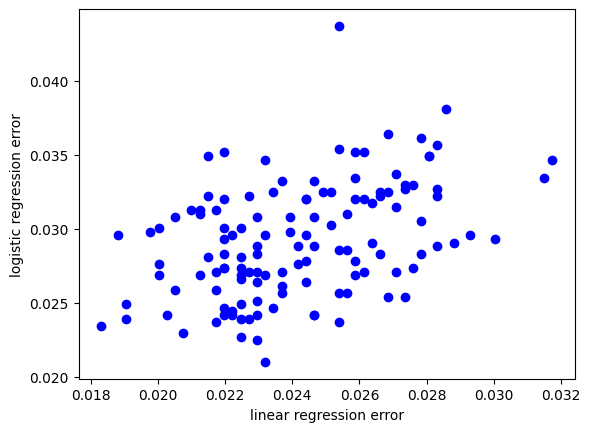

In [12]:
plt.scatter(errlist3, errlist4, color='b', marker='o')
# Add labels and a title
plt.xlabel('linear regression error')
plt.ylabel('logistic regression error')

print("Median Lin: ", np.median(errlist3))
print("Median Log: ", np.median(errlist4))

# Show the plot
plt.show()


# Q12

In [8]:
def gen_data_with_noise(seed):
        np.random.seed(seed)
        # Generate training data
        y_train = np.random.choice([-1,1], size=train_size, p=[0.5,0.5])
        y_train.sort()
        y_test = np.random.choice([-1,1], size=test_size, p=[0.5,0.5])
        y_test.sort()
        X_train = np.zeros((train_size, 2))
        X_test = np.zeros((test_size, 2))

        # if y = 1
        mean1 = [3,2]
        cov1 = [[.4, 0],
                [0, .4]]
        # if y = -1
        mean2 = [5,0]
        cov2 = [[.6, 0],
                [0, .6]]
        # noise
        mean3 = [0,6]
        cov3 = [[.1, 0],
                [0, .3]]

        for i in range(train_size):
                if y_train[i] == 1:
                        X_train[i] = np.random.multivariate_normal(mean1, cov1, 1)
                else:
                        X_train[i] = np.random.multivariate_normal(mean2, cov2, 1)
        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        y_train = y_train.reshape(-1,1)

        for i in range(test_size):
                if y_test[i] == 1:
                        X_test[i] = np.random.multivariate_normal(mean1, cov1, 1)
                else:
                        X_test[i] = np.random.multivariate_normal(mean2, cov2, 1)
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        y_test = y_test.reshape(-1,1)

        # concatenate noise
        X_outlier = np.ones((16,2))
        for t in range(16):
                X_outlier[t] = np.random.multivariate_normal(mean3, cov3, 1)
        X_outlier = np.hstack((np.ones((X_outlier.shape[0], 1)), X_outlier))
        y_outlier = np.ones((1,16))
        y_outlier = y_outlier.reshape(-1,1)
        X_train = np.vstack((X_train, X_outlier))
        y_train = np.vstack((y_train, y_outlier))

        return X_train, y_train, X_test, y_test

In [9]:
random_seed = 128
train_size+=16
errlist5 = []
errlist6 = []
for seed in range(random_seed):
    X_train, y_train, X_test, y_test = gen_data_with_noise(seed)
    errlist5.append(linear_reg_err(X_train, y_train, X_test, y_test))
    errlist6.append(logistic_reg_err(X_train, y_train, X_test, y_test))

Median Lin:  0.0284423828125
Median Log:  0.0289306640625


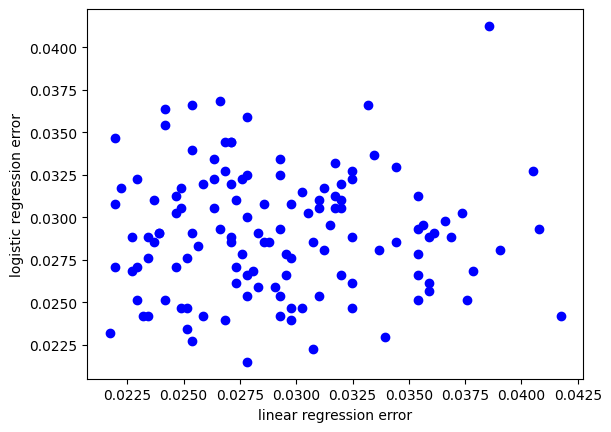

In [11]:
plt.scatter(errlist5, errlist6, color='b', marker='o')
# Add labels and a title
plt.xlabel('linear regression error')
plt.ylabel('logistic regression error')

print("Median Lin: ", np.median(errlist5))
print("Median Log: ", np.median(errlist6))

# Show the plot
plt.show()



The median didn't changed much for logistic regression, even the distribution didn't changed much as well.

The top is still bounded at around 0.04, the bottom is around 0.0225.

However, the outcome of linear regression changed siginficantly. The median rises from 0.0238 to 0.0289. 

The top becomes 0.0425, the bottom becomes 0.0225. The original top was 0.032, and bottom was 0.018.

Most values for linear regression shifted right, meaning their Err increases, and the distribution becomes more separate compare to the last problem.

In these two questions we can see, with noiseless data, linear regression has better performance. However, if we added some noise into the data, the performance of two models would be very alike. (Without looking at the outliers, most data points are within (0.0375,0.0375) to (0.0225, 0.0225))